# import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

# Load Data

## Basic

In [2]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/examples/spx.csv'
spx = pd.read_csv(file_path, header = 0, names = ['Date', 'SPX'])
# header=0 : the first line of csv file is header(column name).
# names=[...] : setting column name of DF

In [3]:
spx.head()

,Date,SPX
0,1990-02-01 00:00:00,328.79
1,1990-02-02 00:00:00,330.92
2,1990-02-05 00:00:00,331.85
3,1990-02-06 00:00:00,329.66
4,1990-02-07 00:00:00,333.75


In [4]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5472 non-null   object 
 1   SPX     5472 non-null   float64
dtypes: float64(1), object(1)
memory usage: 85.6+ KB


## parse_dates parameter

In [8]:
# if you want, when using pd.read_csv(), you can appoint column to use datetime.
# parse_date parameter : list of columns to change datetime type.
spx2 = pd.read_csv(file_path, header = 0, names = ['date', 'spx'],
                   parse_dates = ['date'])

In [9]:
spx2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5472 non-null   datetime64[ns]
 1   spx     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


## Change type : from str to datetime

In [5]:
spx['Date'] = pd.to_datetime(spx['Date'])

In [6]:
spx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5472 non-null   datetime64[ns]
 1   SPX     5472 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 85.6 KB


In [7]:
spx.head()

,Date,SPX
0,1990-02-01,328.79
1,1990-02-02,330.92
2,1990-02-05,331.85
3,1990-02-06,329.66
4,1990-02-07,333.75


# Visualization

## whole Data

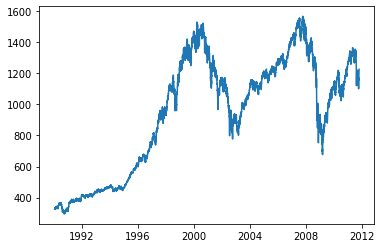

In [10]:
plt.plot(spx2['date'], spx2['spx'])
plt.show()

In [11]:
# Add derived variable 'year' to spx2 DF.
spx2['year'] = spx2['date'].dt.year
spx2.head()

,date,spx,year
0,1990-02-01,328.79,1990
1,1990-02-02,330.92,1990
2,1990-02-05,331.85,1990
3,1990-02-06,329.66,1990
4,1990-02-07,333.75,1990


In [12]:
spx2.tail()

,date,spx,year
5467,2011-10-10,1194.89,2011
5468,2011-10-11,1195.54,2011
5469,2011-10-12,1207.25,2011
5470,2011-10-13,1203.66,2011
5471,2011-10-14,1224.58,2011


In [13]:
# mean value of spx by year, in spx2 DF
spx_by_year = spx2.groupby(by = 'year')['spx'].mean()
spx_by_year

year
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Name: spx, dtype: float64

## mean by year

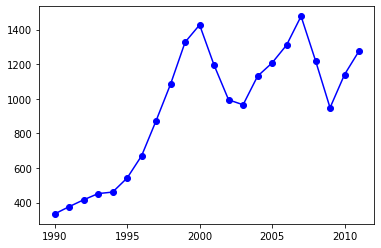

In [14]:
# visualize mean of spx by year
plt.plot(spx_by_year, 'bo-')
plt.show()

## only 2011

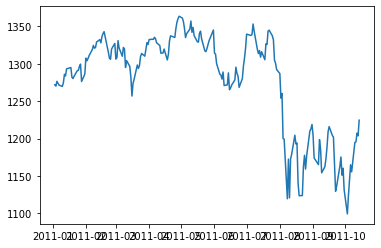

In [15]:
# visualize mean of spx in 2011
spx2_2011 = spx2[spx2['year'] == 2011]
plt.plot(spx2_2011['date'], spx2_2011['spx'])
plt.show()

## mean by year, mean by quarter

In [16]:
# add derived variable 'quarter'
spx2['quarter'] = spx2['date'].dt.quarter

In [17]:
# calculate mean of spx by year, by quarter.
spx_by_year_quarter = spx2.groupby(by = ['year', 'quarter'])['spx'].mean()
spx_by_year_quarter

year  quarter
1990  1           334.751951
      2           349.796508
      3           335.881746
      4           316.562031
1991  1           352.282951
                    ...     
2010  4          1204.585625
2011  1          1302.529032
      2          1318.332857
      3          1225.268437
      4          1171.356000
Name: spx, Length: 88, dtype: float64

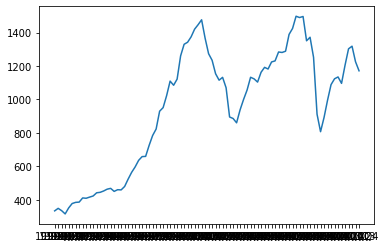

In [21]:
# visualize mean of spx by quarter
year_q = [str(y) + 'Q' + str(q) for y, q in spx_by_year_quarter.index]
plt.plot(year_q, spx_by_year_quarter)
plt.show()

# datetime column to index : easy sampling(like groupby)

In [22]:
spx3 = spx2.set_index(keys = 'date')
spx3

,spx,year,quarter
date,,,
1990-02-01,328.79,1990,1
1990-02-02,330.92,1990,1
1990-02-05,331.85,1990,1
1990-02-06,329.66,1990,1
1990-02-07,333.75,1990,1
...,...,...,...
2011-10-10,1194.89,2011,4
2011-10-11,1195.54,2011,4
2011-10-12,1207.25,2011,4


In [23]:
spx3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spx      5472 non-null   float64
 1   year     5472 non-null   int64  
 2   quarter  5472 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 300.0 KB


In [24]:
spx3.index

DatetimeIndex(['1990-02-01', '1990-02-02', '1990-02-05', '1990-02-06',
               '1990-02-07', '1990-02-08', '1990-02-09', '1990-02-12',
               '1990-02-13', '1990-02-14',
               ...
               '2011-10-03', '2011-10-04', '2011-10-05', '2011-10-06',
               '2011-10-07', '2011-10-10', '2011-10-11', '2011-10-12',
               '2011-10-13', '2011-10-14'],
              dtype='datetime64[ns]', name='date', length=5472, freq=None)

In [25]:
spx2.groupby(by = 'year')['spx'].mean()

year
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Name: spx, dtype: float64

In [26]:
# mean spx by year
spx3.resample('Y', kind = 'period')['spx'].mean()

date
1990     334.123506
1991     376.186324
1992     415.747008
1993     451.614822
1994     460.416508
1995     541.719087
1996     670.494843
1997     873.427787
1998    1085.503254
1999    1327.329563
2000    1427.221071
2001    1194.178992
2002     993.934802
2003     965.227540
2004    1130.649444
2005    1207.229444
2006    1310.461633
2007    1477.184343
2008    1220.042055
2009     948.046389
2010    1139.965516
2011    1276.093015
Freq: A-DEC, Name: spx, dtype: float64

In [27]:
spx2.groupby(by = ['year', 'quarter'])['spx'].mean()

year  quarter
1990  1           334.751951
      2           349.796508
      3           335.881746
      4           316.562031
1991  1           352.282951
                    ...     
2010  4          1204.585625
2011  1          1302.529032
      2          1318.332857
      3          1225.268437
      4          1171.356000
Name: spx, Length: 88, dtype: float64

In [28]:
# mean spx by quarter
s = spx3.resample('Q')['spx'].mean()
s

date
1990-03-31     334.751951
1990-06-30     349.796508
1990-09-30     335.881746
1990-12-31     316.562031
1991-03-31     352.282951
                 ...     
2010-12-31    1204.585625
2011-03-31    1302.529032
2011-06-30    1318.332857
2011-09-30    1225.268437
2011-12-31    1171.356000
Freq: Q-DEC, Name: spx, Length: 88, dtype: float64

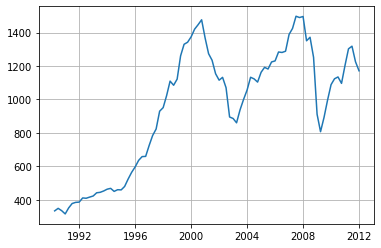

In [29]:
plt.plot(s)
plt.grid()
plt.show()